In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pantarei as rei
import copy
import src.system as sys
import src.Montecarlo as mc
from src.SAW_module import setup, mc_move, simulation, plot_val_over_NMC, unfold, visualize_chain, overlap

# scheduler = rei.scheduler.ThreadScheduler(backend='process')
# job = rei.Thread(simulation, scheduler=scheduler, clear_output=True)

scheduler = rei.scheduler.ThreadScheduler(backend='process')
task = rei.Task(simulation, clear_first=True)
job = rei.Thread(task, scheduler=scheduler)

In [ ]:

N = 100
L = 1000

my_sys = sys.System(N=N,L=L)
montecarlo = mc.Montecarlo(system=my_sys)

my_sys.positions = data['trajectory'][0]
cm = my_sys.centre_of_mass

k += 1
my_sys.positions = data['trajectory'][k]
my_sys.centre_of_mass = cm


visualize_chain(data['trajectory'][0])
visualize_chain(data['trajectory'][k])

# visualize_chain(my_sys.positions)

[ 0.  49.5]
[0.  0.5]


IndexError: list index out of range

In [9]:
N = 100
L = 1000
snapshots = 100
# steps = 12*N
steps = snapshots*3*N
burnin = 3*N

# job(N=N,L=L,steps=steps,burnin=burnin)
data = simulation(N=N,L=L,steps=steps,burnin=burnin)

# visualize_chain(data['trajectory'][0])
# visualize_chain(data['trajectory'][1])
# visualize_chain(data['trajectory'][2])


my_sys = sys.System(N=N,L=L)
montecarlo = mc.Montecarlo(system=my_sys)

print(len(data['trajectory']))
no_overlaps = 0
for i in range(len(data['trajectory'])):
    if i%100 == 0: print(i)
    for j in range(len(data['trajectory'])):
        if i<=j : pass
        
        my_sys.positions = data['trajectory'][i]
        cm = my_sys.centre_of_mass

        my_sys.positions = copy.deepcopy(data['trajectory'][j])
        my_sys.centre_of_mass = cm

        if overlap(data['trajectory'][i],my_sys.positions) is None: 
            print(f'overlaps = {no_overlaps}, {i}, {j}')
            print(overlap(data['trajectory'][i],my_sys.positions))
            no_overlaps += 1
            visualize_chain(data['trajectory'][i])
            visualize_chain(my_sys.positions)
            break
print(no_overlaps)


# plt.scatter(*overlap(data['trajectory'][0],data['trajectory'][2]),edgecolors='k',linewidths=5)

99
0
0


In [ ]:

# Model parameters
N = 300
L = 1000
# L = 50

positions, lattice = setup(N, L)
# plt.plot([r[0] for r in positions], [r[1] for r in positions], '-o')
# plt.show()
# print(np.array(positions).mean())
# np.shape(positions)[1]

# cm = [1,0]
# for i in range(np.shape(positions)[1]):
#     for j in range(np.shape(positions)[0]):
#         positions[j][i] += cm[i]
# print(sum(np.array(positions)/N))



[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


3846315


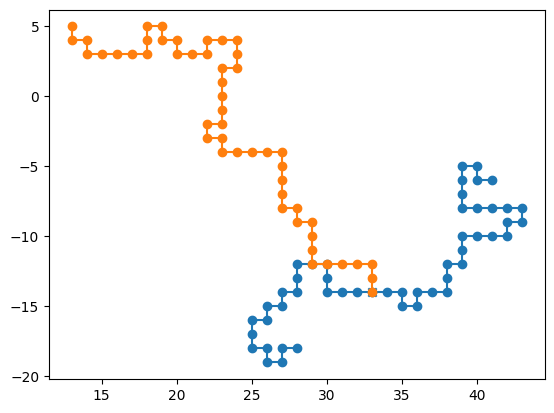

In [ ]:
N = 50
L = 1000
steps = 100

rand_seed = random.randint(0,1e7)
random.seed(rand_seed)
# random.seed(8146347)
print(rand_seed)

positions, lattice = setup(N, L)

for step in range(steps):
    for attempt in range(len(positions)):
        mc_move(positions, lattice)
unfold(positions,L)
# cm = sum(np.array(positions)/N)
# plt.plot([r[0] for r in positions], [r[1] for r in positions], '-o')
# plt.plot(cm[0],cm[1],'o')
# plt.show()

import copy
save_pos, save_lat = copy.deepcopy(positions), copy.deepcopy(lattice)


for step in range(steps):
    for attempt in range(len(positions)):
        mc_move(positions, lattice)
unfold(positions,L)

# positions - 
# overlap = np.where(lattice * save_lat == 1)
overlap = None
for i in range(N):
    is_overlap = False
    pos_i = positions[i]
    for j in range(N):
        pos_j = save_pos[j]
        # if lattice[pos_i[0],pos_i[1]]+save_lat[pos_j[0],pos_j[1]] == 2:
        if positions[i] == save_pos[j]:
            overlap = positions[i]
            is_overlap = True
            break
    if is_overlap: break

# overlap

# lattice[positions[i][0],positions[i][1]]+save_lat[save_pos[j][0],save_pos[j][1]]


plt.plot([r[0] for r in positions], [r[1] for r in positions], '-o')
plt.plot([r[0] for r in save_pos], [r[1] for r in save_pos], '-o')
plt.scatter(*overlap,marker='x')
# plt.plot([r[0] for r in overlap], [r[1] for r in overlap], 'ko')
# plt.show()

- N=10 -> 5/10
- N=100 -> 200
- N=1000 -> 3000

In [32]:
# import matplotlib.animation as animation

# fig, ax = plt.subplots()
# ax.set_aspect('equal')
# ax.set_xlim(-10, 10)
# ax.set_ylim(-10, 10)
# for x in range(5):
#     c = plt.Circle((x, 0), 0.3)
#     ax.add_artist(c)

# # def animate(n):
# #     """Update the system at step n"""
# #     # mc_move(positions,lattice)
# #     for p in ax.patches:
# #         # Set the particle positions here...
# #         p_n = np.array(p.get_center()) + (np.random.random(2) - 0.5)
# #         # p_n = np.array(positions)
# #         p.set_center(p_n)
# #     return ax.patches

# def animate(n):
#     """Update the system at step n"""
#     system = trajectory[n]
#     for i, p in ax.patches:
#         position = system[i]
#         p_n = np.array(position)
#         p.set_center(p_n)
#     return ax.patches

# N = 100
# L = 1000
# steps = int(5*N)
# positions, lattice = setup(N, L)
# trajectory = []

# for _ in range(steps):
#     mc_move(positions,lattice)
#     if _ % (steps/120) == 0:
#         trajectory.append(positions)


# ani = animation.FuncAnimation(fig, animate, 10, interval=50, blit=True)
# plt.show()
# # html = ani.to_html5_video()
# # %matplotlib ipympl

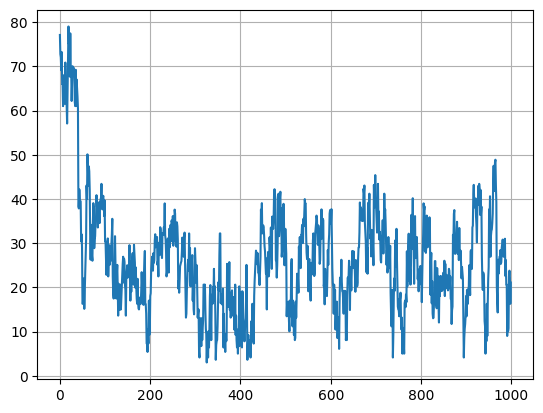

In [21]:
N = 100
L = 1002
job(N=N,L=L,steps=10*N,burnin=0)

scheduler.wait()
data = job(N=N,L=L,steps=10*N,burnin=0)
positions, lattice, R_values = data

plot_val_over_NMC(R_values)

N=10, R=4.9
N=20, R=8.1
N=50, R=1.7e+01
N=100, R=2.5e+01
N=200, R=4.7e+01
N=500, R=9.2e+01


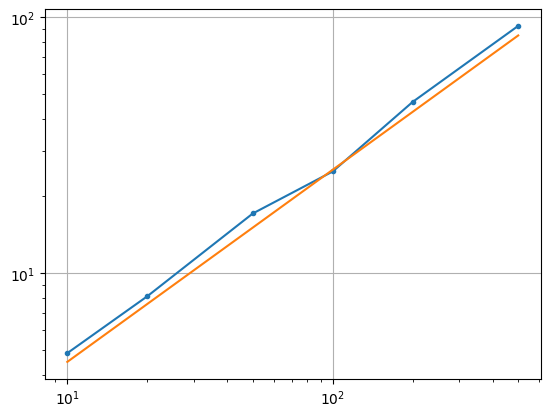

In [14]:
Ns = np.linspace(10,500,dtype=int)
Ns = [10,20,50,100,200,500]
Rs = []
save_pos = []

for N in Ns: 
    positions, lattice, R_values = simulation(N,1000,10*N,4*N)
    save_pos.append(positions)
    Rs.append(np.mean(R_values))
    print(f'N={N}, R={Rs[-1]:.2}')


plt.loglog(Ns,Rs,'.-')
plt.loglog(Ns,[.8*_**(3/4) for _ in Ns],'-')
plt.grid()